<a href="https://colab.research.google.com/github/sabiko1/Final-Project/blob/main/CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/My Drive/') # 'My Drive' is the default name of Google Drives
    os.listdir()

# use os.chdir("my-directory") # to change directory, and
# os.listdir()                 # to list its contents
# os.getcwd()                  # to get the name of the current directory
# os.mkdir("my-new-dir")       # to create a new directory
# See: https://realpython.com/working-with-files-in-python/

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
# ファイルから読み込む
x = np.load('images.npy')
y = np.load('labels.npy')

In [ ]:
import numpy as np

train_ratio = 0.8 #define a ratio on train and test

train_images, test_images = np.split(x, [int(len(x) * train_ratio)])  # separate data with the ratio
train_targets, test_targets = np.split(y, [int(len(y) * train_ratio)]) # separate targets

In [ ]:
# train_images = train_images.reshape((9660, 127 * 128)) # reshape flattens 127 x 128 arrays
# test_images = test_images.reshape((2415, 127 * 128))   # to vectors of 16256 elements

train_images /= 16   # cast as floats
test_images /= 16     # and rescale to [0, 1]

In [ ]:
from tensorflow.keras.utils import to_categorical # encode with the nifty `to_categorical` function

train_labels = to_categorical(train_targets)
test_labels  = to_categorical(test_targets)

In [ ]:
import keras
from keras import layers

inputs = keras.Input(shape=(127,128,1))

# dense layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model = keras.Model(inputs=inputs, outputs=outputs, name="model1")

# show the model1
# keras.utils.plot_model(model2, "model1.png", show_shapes=True)
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248 

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Early stop if val_loss sees no improvement

history = model.fit(train_images, train_labels, validation_split=0.2, epochs=30, batch_size=128, callbacks=[callback]) # 0.2 for validation

Epoch 1/30
61/61 [==============================] - 206s 3s/step - loss: 1.9652 - accuracy: 0.5083 - val_loss: 1.6640 - val_accuracy: 0.5792
Epoch 2/30
61/61 [==============================] - 205s 3s/step - loss: 0.9335 - accuracy: 0.7500 - val_loss: 1.2282 - val_accuracy: 0.6786
Epoch 3/30
61/61 [==============================] - 205s 3s/step - loss: 0.4691 - accuracy: 0.8623 - val_loss: 1.0157 - val_accuracy: 0.7345
Epoch 4/30
61/61 [==============================] - 211s 3s/step - loss: 0.2261 - accuracy: 0.9343 - val_loss: 1.0585 - val_accuracy: 0.7422
Epoch 5/30
61/61 [==============================] - 205s 3s/step - loss: 0.1081 - accuracy: 0.9687 - val_loss: 1.0377 - val_accuracy: 0.7484
Epoch 6/30
61/61 [==============================] - 206s 3s/step - loss: 0.0567 - accuracy: 0.9815 - val_loss: 1.1214 - val_accuracy: 0.7562
Epoch 7/30
61/61 [==============================] - 214s 3s/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 1.0244 - val_accuracy: 0.7852
Epoch 8/30
61

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(x):

    history_dict = x.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

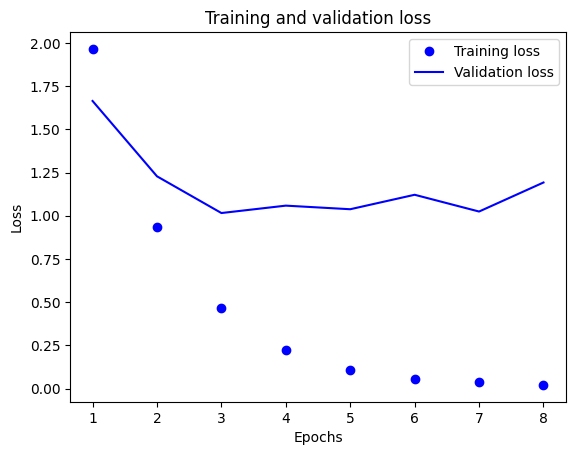

In [ ]:
plot_loss(history)

In [ ]:
model1_loss, model1_acc = model.evaluate(test_images, test_labels)

print('model_acc:', model1_acc)

76/76 [==============================] - 16s 208ms/step - loss: 0.9118 - accuracy: 0.7702
model_acc: 0.7701863646507263


少ない層

In [ ]:
# dense layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model2 = keras.Model(inputs=inputs, outputs=outputs, name="model2")

# show the model1
# keras.utils.plot_model(model2, "model1.png", show_shapes=True)
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 61, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 117120)            0         
                                                                 
 dense_1 (Dense)             (None, 75)                8784075   
                                                            

In [ ]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Early stop if val_loss sees no improvement

history = model2.fit(train_images, train_labels, validation_split=0.2, epochs=30, batch_size=128, callbacks=[callback]) # 0.2 for validation

Epoch 1/30
61/61 [==============================] - 207s 3s/step - loss: 2.1560 - accuracy: 0.4687 - val_loss: 1.8787 - val_accuracy: 0.5507
Epoch 2/30
61/61 [==============================] - 192s 3s/step - loss: 1.0761 - accuracy: 0.7264 - val_loss: 1.5690 - val_accuracy: 0.5885
Epoch 3/30
61/61 [==============================] - 204s 3s/step - loss: 0.6038 - accuracy: 0.8403 - val_loss: 1.3527 - val_accuracy: 0.6465
Epoch 4/30
61/61 [==============================] - 208s 3s/step - loss: 0.2567 - accuracy: 0.9319 - val_loss: 1.3642 - val_accuracy: 0.6579
Epoch 5/30
61/61 [==============================] - 206s 3s/step - loss: 0.0866 - accuracy: 0.9766 - val_loss: 1.6495 - val_accuracy: 0.6615
Epoch 6/30
61/61 [==============================] - 226s 4s/step - loss: 0.0441 - accuracy: 0.9878 - val_loss: 1.5939 - val_accuracy: 0.7008
Epoch 7/30
61/61 [==============================] - 203s 3s/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 1.6493 - val_accuracy: 0.6915
Epoch 8/30
61

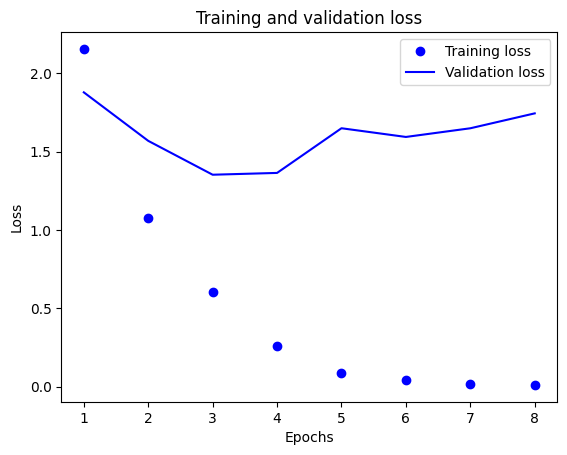

In [ ]:
plot_loss(history)

In [ ]:
model1_loss, model1_acc = model2.evaluate(test_images, test_labels)

print('model_acc:', model1_acc)

76/76 [==============================] - 16s 206ms/step - loss: 1.1411 - accuracy: 0.6973
model_acc: 0.6973084807395935


Gelu

In [ ]:
# dense layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='gelu')(inputs) #gelu
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='gelu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='gelu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model3 = keras.Model(inputs=inputs, outputs=outputs, name="model3")

# show the model1
# keras.utils.plot_model(model2, "model1.png", show_shapes=True)
model3.summary()

Model: "model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 61, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248 

In [ ]:
model3.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # Early stop if val_loss sees no improvement

history3 = model3.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 330s 5s/step - loss: 2.3703 - accuracy: 0.4227 - val_loss: 1.8266 - val_accuracy: 0.5274
Epoch 2/15
61/61 [==============================] - 329s 5s/step - loss: 1.1253 - accuracy: 0.6953 - val_loss: 1.4232 - val_accuracy: 0.6294
Epoch 3/15
61/61 [==============================] - 304s 5s/step - loss: 0.7526 - accuracy: 0.7974 - val_loss: 1.2049 - val_accuracy: 0.6749
Epoch 4/15
61/61 [==============================] - 295s 5s/step - loss: 0.4778 - accuracy: 0.8659 - val_loss: 1.0934 - val_accuracy: 0.6941
Epoch 5/15
61/61 [==============================] - 316s 5s/step - loss: 0.2826 - accuracy: 0.9213 - val_loss: 1.1117 - val_accuracy: 0.7189
Epoch 6/15
61/61 [==============================] - 300s 5s/step - loss: 0.1574 - accuracy: 0.9546 - val_loss: 1.1258 - val_accuracy: 0.7220
Epoch 7/15
61/61 [==============================] - 298s 5s/step - loss: 0.0846 - accuracy: 0.9745 - val_loss: 1.2533 - val_accuracy: 0.7360
Epoch 8/15
61

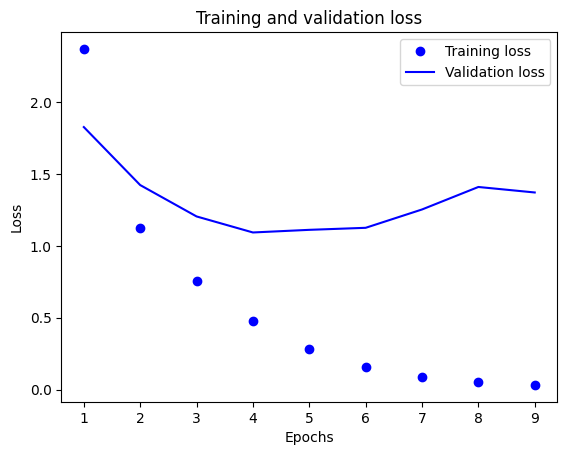

In [ ]:
plot_loss(history3)

In [ ]:
model1_loss, model1_acc = model3.evaluate(test_images, test_labels)

print('model3_acc:', model1_acc)

76/76 [==============================] - 27s 352ms/step - loss: 0.9542 - accuracy: 0.7474
model3_acc: 0.7474120259284973


dropout

In [ ]:
import keras
from keras import layers

inputs = keras.Input(shape=(127,128,1))

# dense layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model4 = keras.Model(inputs=inputs, outputs=outputs, name="model4")

# show the model1
# keras.utils.plot_model(model4, "model4.png", show_shapes=True)
model4.summary()

Model: "model4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 126, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 61, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248 

In [ ]:
model4.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history4 = model4.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 215s 3s/step - loss: 2.1143 - accuracy: 0.4682 - val_loss: 1.7001 - val_accuracy: 0.5455
Epoch 2/15
61/61 [==============================] - 208s 3s/step - loss: 1.0758 - accuracy: 0.7114 - val_loss: 1.3275 - val_accuracy: 0.6434
Epoch 3/15
61/61 [==============================] - 204s 3s/step - loss: 0.7041 - accuracy: 0.8050 - val_loss: 1.0828 - val_accuracy: 0.7076
Epoch 4/15
61/61 [==============================] - 216s 4s/step - loss: 0.4579 - accuracy: 0.8692 - val_loss: 0.9307 - val_accuracy: 0.7438
Epoch 5/15
61/61 [==============================] - 203s 3s/step - loss: 0.3065 - accuracy: 0.9076 - val_loss: 0.9473 - val_accuracy: 0.7567
Epoch 6/15
61/61 [==============================] - 204s 3s/step - loss: 0.2067 - accuracy: 0.9392 - val_loss: 0.8229 - val_accuracy: 0.7867
Epoch 7/15
61/61 [==============================] - 199s 3s/step - loss: 0.1470 - accuracy: 0.9537 - val_loss: 0.8145 - val_accuracy: 0.7857
Epoch 8/15
61

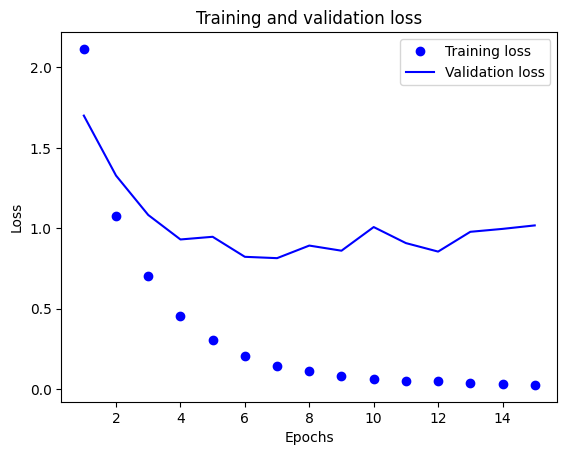

In [ ]:
plot_loss(history4)

In [ ]:
model1_loss, model1_acc = model4.evaluate(test_images, test_labels)

print('model4_acc:', model1_acc)

76/76 [==============================] - 16s 208ms/step - loss: 0.9351 - accuracy: 0.8356
model4_acc: 0.8356107473373413


Dropoutの場所

In [ ]:
# dense layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model5 = keras.Model(inputs=inputs, outputs=outputs, name="model5")

# show the model1
# keras.utils.plot_model(model4, "model4.png", show_shapes=True)
model5.summary()

Model: "model5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 126, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 61, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0    

In [ ]:
model5.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history5 = model5.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 199s 3s/step - loss: 2.1344 - accuracy: 0.4718 - val_loss: 1.7762 - val_accuracy: 0.5409
Epoch 2/15
61/61 [==============================] - 200s 3s/step - loss: 1.1379 - accuracy: 0.6932 - val_loss: 1.4623 - val_accuracy: 0.6170
Epoch 3/15
61/61 [==============================] - 212s 3s/step - loss: 0.7140 - accuracy: 0.8006 - val_loss: 1.1329 - val_accuracy: 0.7101
Epoch 4/15
61/61 [==============================] - 210s 3s/step - loss: 0.4104 - accuracy: 0.8837 - val_loss: 0.9835 - val_accuracy: 0.7350
Epoch 5/15
61/61 [==============================] - 208s 3s/step - loss: 0.2292 - accuracy: 0.9315 - val_loss: 0.9179 - val_accuracy: 0.7640
Epoch 6/15
61/61 [==============================] - 207s 3s/step - loss: 0.1302 - accuracy: 0.9603 - val_loss: 0.9579 - val_accuracy: 0.7562
Epoch 7/15
61/61 [==============================] - 208s 3s/step - loss: 0.0760 - accuracy: 0.9764 - val_loss: 1.0259 - val_accuracy: 0.7780
Epoch 8/15
61

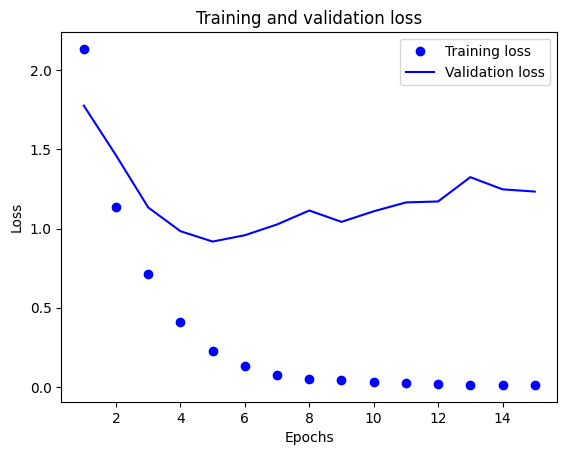

In [ ]:
plot_loss(history5)

In [ ]:
model1_loss, model1_acc = model5.evaluate(test_images, test_labels)

print('model5_acc:', model1_acc)

76/76 [==============================] - 16s 213ms/step - loss: 0.8040 - accuracy: 0.8012
model5_acc: 0.8012422323226929


正規化

In [ ]:
kernel_regularizer=regularizers.l2(0.02)

In [ ]:
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(127,128,1))

# dense layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.02), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.02), activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model6 = keras.Model(inputs=inputs, outputs=outputs, name="model6")

# show the model1
keras.utils.plot_model(model6, "model6.png", show_shapes=True)
model6.summary()

Model: "model6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 126, 32)      320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 61, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248 

In [ ]:
model6.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history6 = model6.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 213s 3s/step - loss: 2.7180 - accuracy: 0.4741 - val_loss: 2.0236 - val_accuracy: 0.5518
Epoch 2/15
61/61 [==============================] - 205s 3s/step - loss: 1.2501 - accuracy: 0.7157 - val_loss: 1.4865 - val_accuracy: 0.6506
Epoch 3/15
61/61 [==============================] - 203s 3s/step - loss: 0.7647 - accuracy: 0.8273 - val_loss: 1.2686 - val_accuracy: 0.6977
Epoch 4/15
61/61 [==============================] - 215s 4s/step - loss: 0.4817 - accuracy: 0.8974 - val_loss: 1.1788 - val_accuracy: 0.7117
Epoch 5/15
61/61 [==============================] - 197s 3s/step - loss: 0.3279 - accuracy: 0.9376 - val_loss: 1.1163 - val_accuracy: 0.7340
Epoch 6/15
61/61 [==============================] - 203s 3s/step - loss: 0.2317 - accuracy: 0.9604 - val_loss: 1.2354 - val_accuracy: 0.7241
Epoch 7/15
61/61 [==============================] - 214s 4s/step - loss: 0.1830 - accuracy: 0.9688 - val_loss: 1.1736 - val_accuracy: 0.7365
Epoch 8/15
61

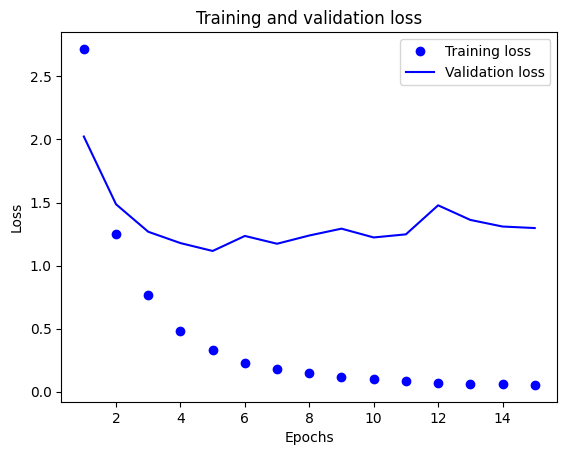

In [ ]:
plot_loss(history6)

In [ ]:
model1_loss, model1_acc = model6.evaluate(test_images, test_labels)

print('model6_acc:', model1_acc)

76/76 [==============================] - 25s 330ms/step - loss: 0.9738 - accuracy: 0.7760
model6_acc: 0.775983452796936


normalizationのいち

In [ ]:
# dense layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.02), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model7 = keras.Model(inputs=inputs, outputs=outputs, name="model7")

# show the model1
# keras.utils.plot_model(model7, "model7.png", show_shapes=True)
model7.summary()

Model: "model7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 126, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 61, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248 

In [ ]:
model7.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history7 = model7.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 210s 3s/step - loss: 2.4119 - accuracy: 0.4783 - val_loss: 1.8959 - val_accuracy: 0.5704
Epoch 2/15
61/61 [==============================] - 204s 3s/step - loss: 1.1201 - accuracy: 0.7242 - val_loss: 1.4012 - val_accuracy: 0.6506
Epoch 3/15
61/61 [==============================] - 203s 3s/step - loss: 0.6572 - accuracy: 0.8327 - val_loss: 1.1131 - val_accuracy: 0.7226
Epoch 4/15
61/61 [==============================] - 197s 3s/step - loss: 0.3737 - accuracy: 0.9063 - val_loss: 1.1543 - val_accuracy: 0.7277
Epoch 5/15
61/61 [==============================] - 204s 3s/step - loss: 0.2182 - accuracy: 0.9442 - val_loss: 1.1328 - val_accuracy: 0.7583
Epoch 6/15
61/61 [==============================] - 206s 3s/step - loss: 0.1267 - accuracy: 0.9717 - val_loss: 1.2319 - val_accuracy: 0.7386
Epoch 7/15
61/61 [==============================] - 204s 3s/step - loss: 0.0874 - accuracy: 0.9789 - val_loss: 1.3483 - val_accuracy: 0.7257
Epoch 8/15
61

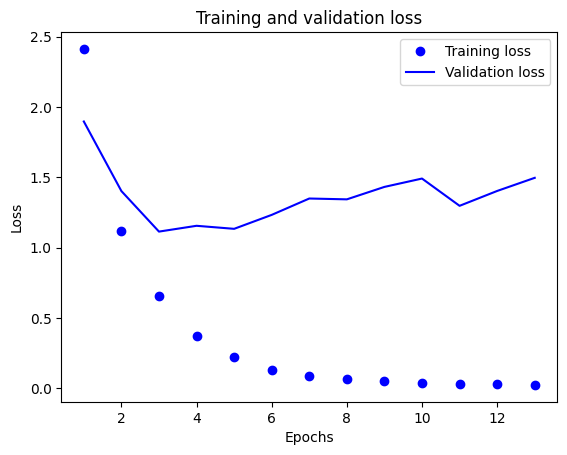

In [ ]:
plot_loss(history7)

In [ ]:
model1_loss, model1_acc = model7.evaluate(test_images, test_labels)

print('model7_acc:', model1_acc)

76/76 [==============================] - 15s 198ms/step - loss: 0.9452 - accuracy: 0.7644
model7_acc: 0.7643892168998718


adamsで

In [ ]:
# dense layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model8 = keras.Model(inputs=inputs, outputs=outputs, name="model8")

# show the model1
# keras.utils.plot_model(model8, "model8.png", show_shapes=True)
model8.summary()

Model: "model8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 126, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 61, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        9248 

In [ ]:
model8.compile(
    loss='categorical_crossentropy',
    optimizer='adam', # adam で
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history8 = model8.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 203s 3s/step - loss: 2.1333 - accuracy: 0.4758 - val_loss: 1.5448 - val_accuracy: 0.6004
Epoch 2/15
61/61 [==============================] - 206s 3s/step - loss: 0.9957 - accuracy: 0.7270 - val_loss: 1.3347 - val_accuracy: 0.6532
Epoch 3/15
61/61 [==============================] - 199s 3s/step - loss: 0.6745 - accuracy: 0.8090 - val_loss: 1.0905 - val_accuracy: 0.6977
Epoch 4/15
61/61 [==============================] - 199s 3s/step - loss: 0.4020 - accuracy: 0.8825 - val_loss: 0.9893 - val_accuracy: 0.7340
Epoch 5/15
61/61 [==============================] - 206s 3s/step - loss: 0.2436 - accuracy: 0.9242 - val_loss: 0.9636 - val_accuracy: 0.7604
Epoch 6/15
61/61 [==============================] - 206s 3s/step - loss: 0.1602 - accuracy: 0.9471 - val_loss: 0.8543 - val_accuracy: 0.7857
Epoch 7/15
61/61 [==============================] - 205s 3s/step - loss: 0.1108 - accuracy: 0.9635 - val_loss: 0.9294 - val_accuracy: 0.7919
Epoch 8/15
61

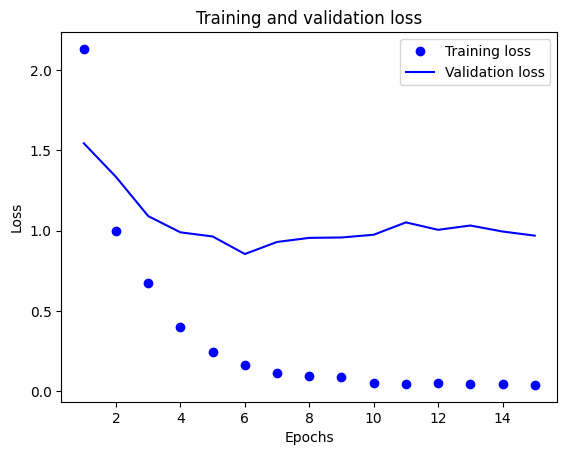

In [ ]:
plot_loss(history8)

In [ ]:
model1_loss, model1_acc = model8.evaluate(test_images, test_labels)

print('model8_acc:', model1_acc)

76/76 [==============================] - 15s 196ms/step - loss: 0.9071 - accuracy: 0.8522
model8_acc: 0.852173924446106


フィルタ数変更

In [ ]:
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(127,128,1))

# dense layers
x = layers.Conv2D(filters=16, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model9 = keras.Model(inputs=inputs, outputs=outputs, name="model9")

# show the model1
# keras.utils.plot_model(model8, "model8.png", show_shapes=True)
model9.summary()

model9.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "model9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 125, 126, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history9 = model9.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 173s 3s/step - loss: 2.0785 - accuracy: 0.4797 - val_loss: 1.6514 - val_accuracy: 0.5833
Epoch 2/15
61/61 [==============================] - 151s 2s/step - loss: 0.9189 - accuracy: 0.7549 - val_loss: 1.1339 - val_accuracy: 0.7008
Epoch 3/15
61/61 [==============================] - 144s 2s/step - loss: 0.5143 - accuracy: 0.8496 - val_loss: 1.0247 - val_accuracy: 0.7314
Epoch 4/15
61/61 [==============================] - 156s 3s/step - loss: 0.3116 - accuracy: 0.9076 - val_loss: 0.9040 - val_accuracy: 0.7552
Epoch 5/15
61/61 [==============================] - 145s 2s/step - loss: 0.1911 - accuracy: 0.9427 - val_loss: 0.9349 - val_accuracy: 0.7702
Epoch 6/15
61/61 [==============================] - 154s 3s/step - loss: 0.1276 - accuracy: 0.9604 - val_loss: 0.9292 - val_accuracy: 0.7759
Epoch 7/15
61/61 [==============================] - 147s 2s/step - loss: 0.0827 - accuracy: 0.9705 - val_loss: 0.9972 - val_accuracy: 0.8007
Epoch 8/15
61

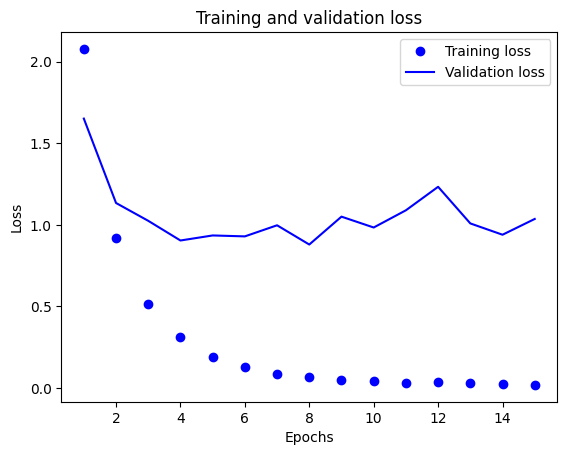

76/76 [==============================] - 12s 156ms/step - loss: 0.9439 - accuracy: 0.8340
model9_acc: 0.8339544534683228


In [ ]:
plot_loss(history9)

model1_loss, model1_acc = model9.evaluate(test_images, test_labels)

print('model9_acc:', model1_acc)

In [ ]:
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(127,128,1))

# dense layers
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x) #追加
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model10 = keras.Model(inputs=inputs, outputs=outputs, name="model10")

# show the model1
# keras.utils.plot_model(model8, "model8.png", show_shapes=True)
model10.summary()

model10.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Model: "model10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 127, 128, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                       

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history9 = model10.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 233s 4s/step - loss: 2.0992 - accuracy: 0.4801 - val_loss: 1.6243 - val_accuracy: 0.6092
Epoch 2/15
61/61 [==============================] - 223s 4s/step - loss: 0.9801 - accuracy: 0.7382 - val_loss: 1.2485 - val_accuracy: 0.6718
Epoch 3/15
61/61 [==============================] - 227s 4s/step - loss: 0.5966 - accuracy: 0.8288 - val_loss: 1.0221 - val_accuracy: 0.7226
Epoch 4/15
61/61 [==============================] - 222s 4s/step - loss: 0.3644 - accuracy: 0.8901 - val_loss: 0.9734 - val_accuracy: 0.7510
Epoch 5/15
61/61 [==============================] - 212s 3s/step - loss: 0.2456 - accuracy: 0.9227 - val_loss: 0.9774 - val_accuracy: 0.7531
Epoch 6/15
61/61 [==============================] - 222s 4s/step - loss: 0.1912 - accuracy: 0.9370 - val_loss: 1.0556 - val_accuracy: 0.7417
Epoch 7/15
61/61 [==============================] - 221s 4s/step - loss: 0.1497 - accuracy: 0.9533 - val_loss: 1.0454 - val_accuracy: 0.7635
Epoch 8/15
61

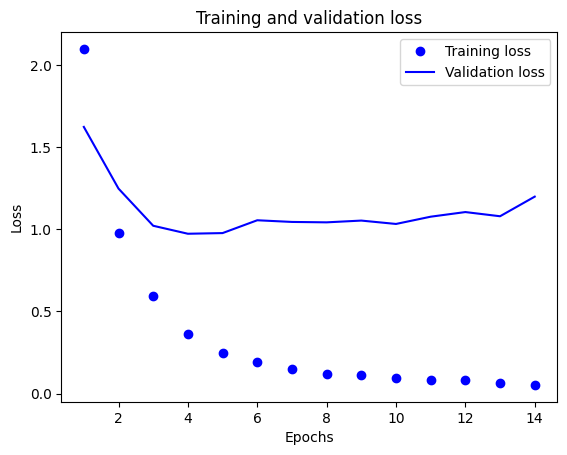

76/76 [==============================] - 14s 186ms/step - loss: 0.8493 - accuracy: 0.7946
model10_acc: 0.7946169972419739


In [ ]:
plot_loss(history9)

model1_loss, model1_acc = model10.evaluate(test_images, test_labels)

print('model10_acc:', model1_acc)

ここまでだとModel7が一番良さそう。

L2 regularization

In [ ]:
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(127*128,))

# dense layers
dense = layers.Dense(512, kernel_regularizer=regularizers.l2(0.02), activation='gelu') #gelu
x = dense(inputs)
x = layers.Dense(512, kernel_regularizer=regularizers.l2(0.02), activation='gelu')(x)
x = layers.Dense(256, kernel_regularizer=regularizers.l2(0.02), activation='gelu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model9 = keras.Model(inputs=inputs, outputs=outputs, name="model9")

# show the model1
keras.utils.plot_model(model9, "model9.png", show_shapes=True)
model9.summary()

model9.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "model9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense (Dense)               (None, 512)               8323584   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 75)                19275     
                                                                 
Total params: 8,736,843
Trainable params: 8,736,843
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history9 = model9.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback])

Epoch 1/15
61/61 [==============================] - 15s 221ms/step - loss: 10.9532 - accuracy: 0.0245 - val_loss: 4.7613 - val_accuracy: 0.0135
Epoch 2/15
61/61 [==============================] - 11s 173ms/step - loss: 4.3942 - accuracy: 0.0109 - val_loss: 4.3175 - val_accuracy: 0.0135
Epoch 3/15
61/61 [==============================] - 11s 184ms/step - loss: 4.3183 - accuracy: 0.0096 - val_loss: 4.3175 - val_accuracy: 0.0135
Epoch 4/15
61/61 [==============================] - 12s 203ms/step - loss: 4.3182 - accuracy: 0.0096 - val_loss: 4.3175 - val_accuracy: 0.0135
Epoch 5/15
61/61 [==============================] - 11s 184ms/step - loss: 4.3183 - accuracy: 0.0118 - val_loss: 4.3175 - val_accuracy: 0.0129
Epoch 6/15
61/61 [==============================] - 10s 168ms/step - loss: 4.3182 - accuracy: 0.0110 - val_loss: 4.3175 - val_accuracy: 0.0135
Epoch 7/15
61/61 [==============================] - 14s 229ms/step - loss: 4.3182 - accuracy: 0.0107 - val_loss: 4.3175 - val_accuracy: 0.012

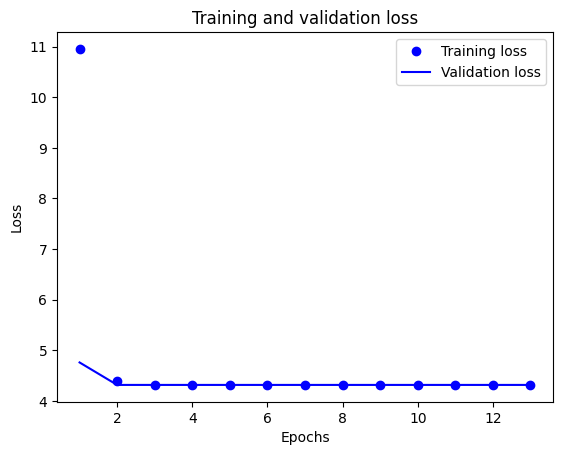

In [ ]:
plot_loss(history9)

In [ ]:
model1_loss, model1_acc = model9.evaluate(test_images, test_labels)

print('model9_acc:', model1_acc)

76/76 [==============================] - 2s 22ms/step - loss: 4.3175 - accuracy: 0.0133
model9_acc: 0.013250517658889294


In [ ]:
# dense layers
dense = layers.Dense(512, kernel_regularizer=regularizers.l2(0.02), activation='gelu') #gelu
x = dense(inputs)
x = layers.Dense(512, activation='gelu')(x)
x = layers.Dense(256, activation='gelu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model10 = keras.Model(inputs=inputs, outputs=outputs, name="model10")

# show the model1
keras.utils.plot_model(model10, "model10.png", show_shapes=True)
model10.summary()

model10.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "model10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense_8 (Dense)             (None, 512)               8323584   
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 75)                19275     
                                                                 
Total params: 8,736,843
Trainable params: 8,736,843
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history10 = model10.fit(train_images, train_labels, validation_split=0.2, epochs=30, batch_size=128, callbacks=[callback])

Epoch 1/30
61/61 [==============================] - 15s 230ms/step - loss: 5.7147 - accuracy: 0.1024 - val_loss: 3.7043 - val_accuracy: 0.2143
Epoch 2/30
61/61 [==============================] - 13s 214ms/step - loss: 3.1814 - accuracy: 0.3283 - val_loss: 3.4255 - val_accuracy: 0.3033
Epoch 3/30
61/61 [==============================] - 13s 211ms/step - loss: 2.8141 - accuracy: 0.4252 - val_loss: 3.1832 - val_accuracy: 0.3313
Epoch 4/30
61/61 [==============================] - 16s 264ms/step - loss: 2.5749 - accuracy: 0.4776 - val_loss: 3.1936 - val_accuracy: 0.3256
Epoch 5/30
61/61 [==============================] - 11s 187ms/step - loss: 2.4048 - accuracy: 0.5173 - val_loss: 2.7200 - val_accuracy: 0.4534
Epoch 6/30
61/61 [==============================] - 13s 205ms/step - loss: 2.2683 - accuracy: 0.5483 - val_loss: 2.5897 - val_accuracy: 0.4591
Epoch 7/30
61/61 [==============================] - 13s 220ms/step - loss: 2.1165 - accuracy: 0.5791 - val_loss: 2.9826 - val_accuracy: 0.3701

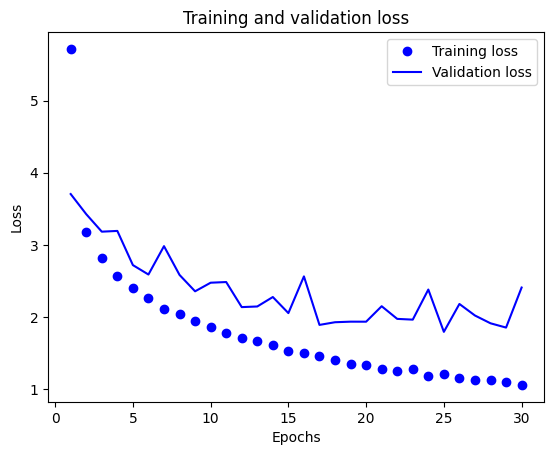

In [ ]:
plot_loss(history10)

In [ ]:
model1_loss, model1_acc = model10.evaluate(test_images, test_labels)

print('model10_acc:', model1_acc)

76/76 [==============================] - 2s 21ms/step - loss: 2.3498 - accuracy: 0.5867
model10_acc: 0.5867494940757751


dropout

In [ ]:
inputs = keras.Input(shape=(127*128,))

# dense layers
dense = layers.Dense(512, activation='gelu') #gelu
x = dense(inputs)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='gelu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='gelu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model11 = keras.Model(inputs=inputs, outputs=outputs, name="model11")

# show the model1
keras.utils.plot_model(model11, "model10.png", show_shapes=True)
model11.summary()

model11.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

Model: "model11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 16256)]           0         
                                                                 
 dense_20 (Dense)            (None, 512)               8323584   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0   

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Early stop if val_loss sees no improvement

history11 = model11.fit(train_images, train_labels, validation_split=0.2, epochs=30, batch_size=128, callbacks=[callback])

Epoch 1/30
61/61 [==============================] - 13s 204ms/step - loss: 3.7584 - accuracy: 0.1090 - val_loss: 3.0721 - val_accuracy: 0.3235
Epoch 2/30
61/61 [==============================] - 11s 179ms/step - loss: 2.6325 - accuracy: 0.3222 - val_loss: 2.3013 - val_accuracy: 0.4720
Epoch 3/30
61/61 [==============================] - 19s 313ms/step - loss: 2.0011 - accuracy: 0.4613 - val_loss: 1.8750 - val_accuracy: 0.5388
Epoch 4/30
61/61 [==============================] - 13s 205ms/step - loss: 1.6236 - accuracy: 0.5424 - val_loss: 1.5780 - val_accuracy: 0.5968
Epoch 5/30
61/61 [==============================] - 13s 222ms/step - loss: 1.3380 - accuracy: 0.6132 - val_loss: 1.4206 - val_accuracy: 0.6190
Epoch 6/30
61/61 [==============================] - 12s 205ms/step - loss: 1.1670 - accuracy: 0.6497 - val_loss: 1.3147 - val_accuracy: 0.6335
Epoch 7/30
61/61 [==============================] - 12s 199ms/step - loss: 0.9775 - accuracy: 0.7013 - val_loss: 1.2392 - val_accuracy: 0.6605

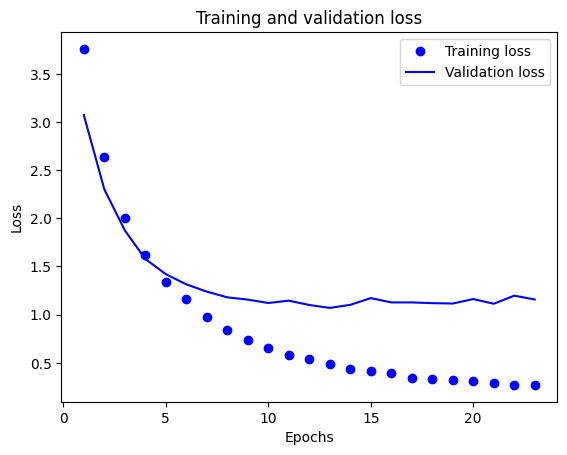

In [ ]:
plot_loss(history11)

In [ ]:
model1_loss, model1_acc = model11.evaluate(test_images, test_labels)

print('model11_acc:', model1_acc)

76/76 [==============================] - 3s 32ms/step - loss: 0.8878 - accuracy: 0.7565
model11_acc: 0.7565217614173889
